## Installing Dependencies

In [3]:
pip install --upgrade git+https://github.com/mne-tools/mne-python@main

  Cloning https://github.com/mne-tools/mne-python (to revision main) to c:\users\prakh\appdata\local\temp\pip-req-build-p_6ruems
  Resolved https://github.com/mne-tools/mne-python to commit 8af33df490f94c3dd628cfc23beafed1a6cc6361
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/44.1 MB 1.4 MB/s eta 0:00:33
     --------------------------------------- 0.1/44.1 MB 770.8 kB/s eta 0:00:58
     --------------------------------------- 0.1/44.1 MB 804.6 kB/s eta 0:00:55
     ---------------------------------------- 0.2/44.1 MB 1.4 MB/s eta 0:00:32
     ---------------------------------------- 0.4

  Running command git clone --filter=blob:none --quiet https://github.com/mne-tools/mne-python 'C:\Users\prakh\AppData\Local\Temp\pip-req-build-p_6ruems'

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\prakh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Import Libraries

In [12]:
import mne
import numpy as np
import os



## Input Data

In [19]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_folder

WindowsPath('C:/Users/prakh/mne_data/MNE-sample-data')

In [20]:
sample_data_raw_file= os.path.join(
    sample_data_folder, "MEG", "sample", "sample_audvis_raw.fif"
)
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file C:\Users\prakh\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


In [22]:
print(raw)

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.3 MB, data not loaded>


In [23]:
eeg_and_eog = raw.copy().pick(picks=["eeg", "eog"])

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


In [24]:
print(eeg_and_eog)

<Raw | sample_audvis_raw.fif, 61 x 166800 (277.7 s), ~3.0 MB, data not loaded>


In [25]:
print(eeg_and_eog.info)

<Info | 20 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 1 items (EEG 053)
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 61
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: []
 sfreq: 600.6 Hz
>


Using matplotlib as 2D backend.


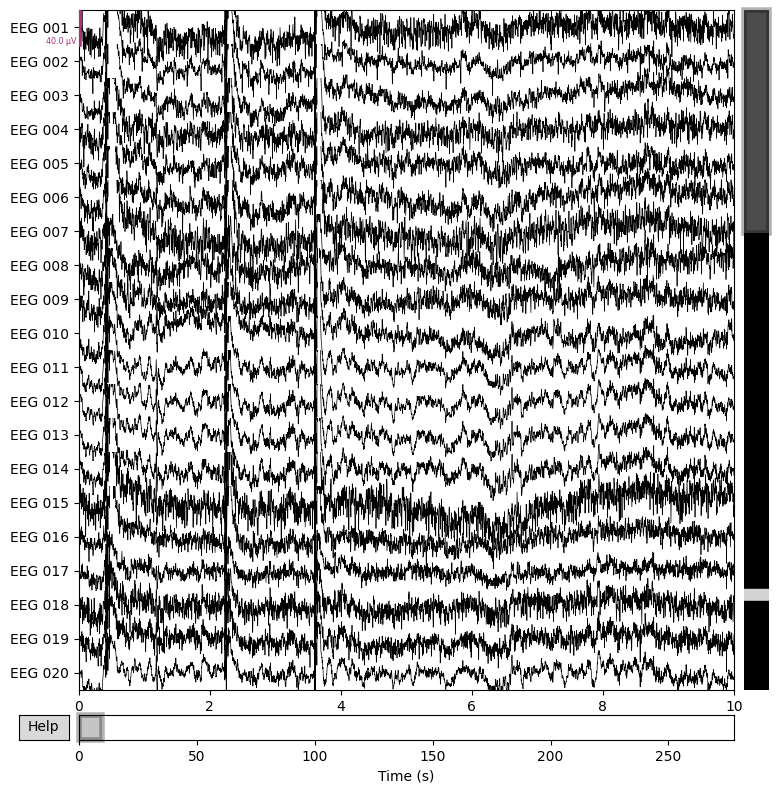

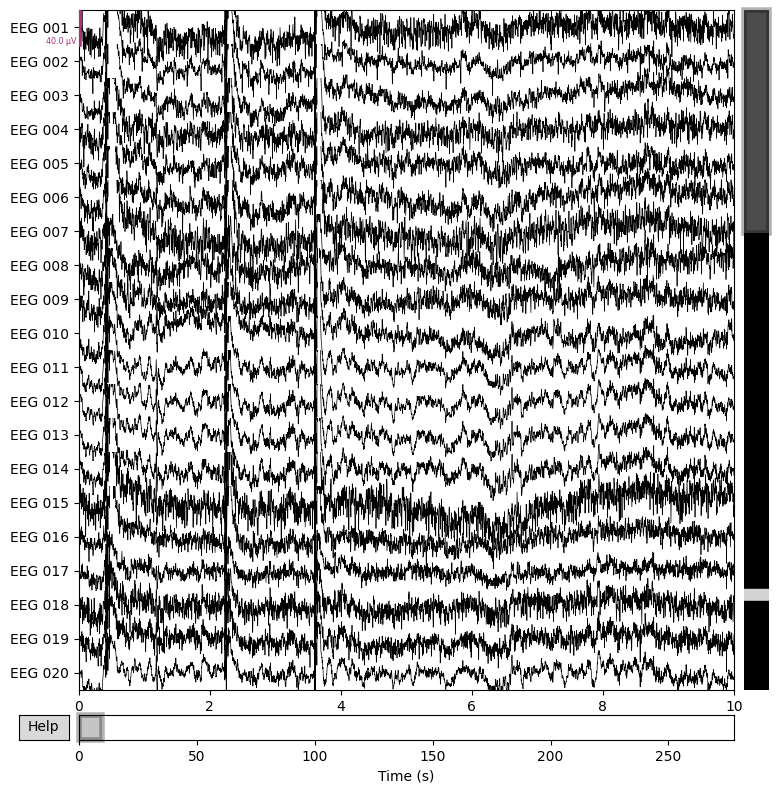

In [29]:
eeg_raw=eeg_and_eog
eeg_raw.load_data()
eeg_raw.plot()

## Data Preprocessing

In [ ]:
# Apply baseline correction
raw.set_eeg_reference('average')
raw.apply_baseline((None, 0.5))

# Apply a notch filter to remove 50 Hz power line noise
raw.notch_filter(50)

# Apply ICA (Independent Component Analysis) to remove artifacts
ica = mne.preprocessing.ICA(n_components=0.95)
ica.fit(raw)
ica.plot_components()

# Select components to exclude (e.g., eye blinks)
ica.exclude = [1, 2]  # Replace with actual component indices

# Apply ICA to remove selected components
raw = raw.apply_ica(ica)

## Visualization

In [ ]:
# Plot the raw EEG data
plot_raw(raw)

# Plot the power spectrum density (PSD) for each EEG channel
plot_psd(raw, picks=eeg_channels)

# Extract epochs for different mind activities (e.g., rest, task1, task2)
epochs_rest = mne.Epochs(raw, picks=eeg_channels, events=rest_events, tmin=-0.2, tmax=1.0)
epochs_task1 = mne.Epochs(raw, picks=eeg_channels, events=task1_events, tmin=-0.2, tmax=1.0)
epochs_task2 = mne.Epochs(raw, picks=eeg_channels, events=task2_events, tmin=-0.2, tmax=1.0)

# Plot the averaged epochs for each condition
epochs_rest.average().plot(time_unit='s')
epochs_task1.average().plot(time_unit='s')
epochs_task2.average().plot(time_unit='s')

# Plot the PSD of averaged epochs for each condition
plot_epochs_psd_topomap(epochs_rest.average(), ch_type='eeg')
plot_epochs_psd_topomap(epochs_task1.average(), ch_type='eeg')
plot_epochs_psd_topomap(epochs_task2.average(), ch_type='eeg')